
<pre>
<center><b><h1>Machine Learning</b></center>
<center><b><h1>OM THORIYA</h1></b></center>
<center><b><h1>Task- 2</b></center>    
<pre>  

## 1️⃣ Load Dataset & Basic Info

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Loan_default.csv")
d

# Basic inspection
df.head()
df.info()
df.describe()


## 2️⃣ Handle Missing Values

In [2]:
df.isnull().sum()


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### Numerical columns → fill with median

In [3]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


### Categorical columns → fill with mode

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


## 3️⃣ Identify & Handle Outliers (IQR Method)

In [7]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]


Apply to numerical columns:

In [8]:
for col in num_cols:
    df = remove_outliers_iqr(df, col)


## 4️⃣ Encode Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## 5️⃣ Normalize / Scale Numerical Features
### Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


## 6️⃣ Exploratory Data Analysis (EDA)
### Target variable distribution

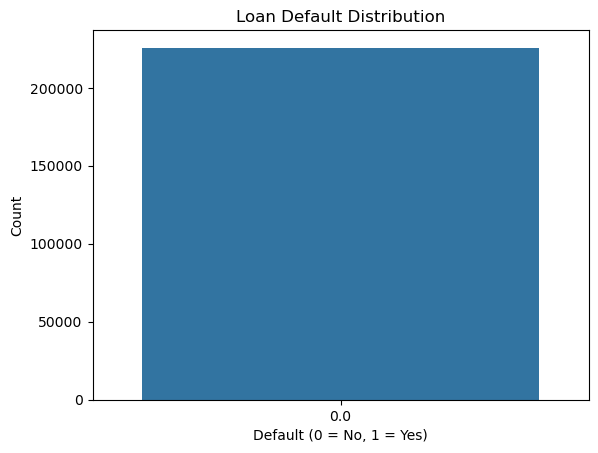

In [23]:
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



### Correlation Heatmap

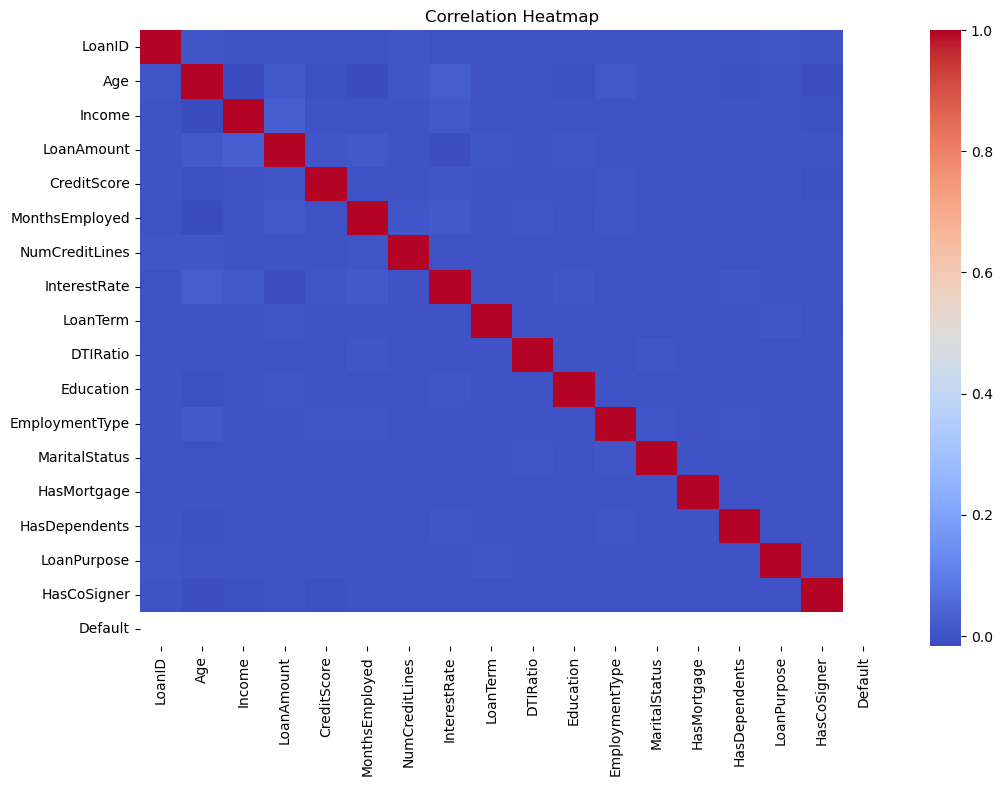

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Numerical Feature Distribution

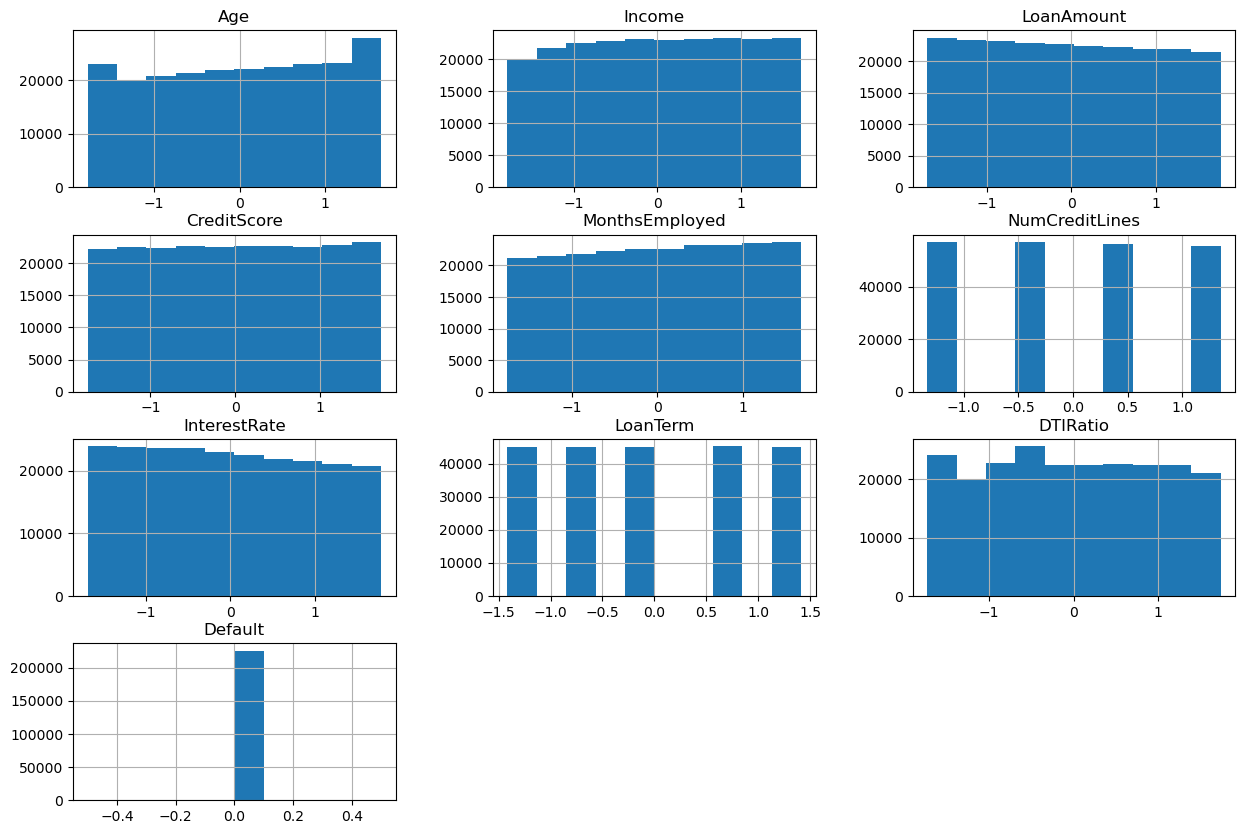

In [18]:
df[num_cols].hist(figsize=(15,10))
plt.show()


### Boxplot for Outlier Visualization

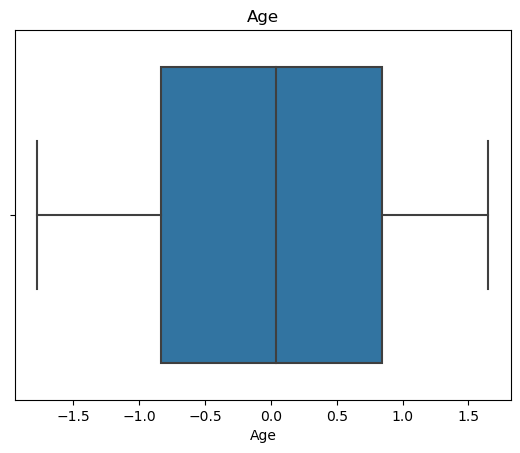

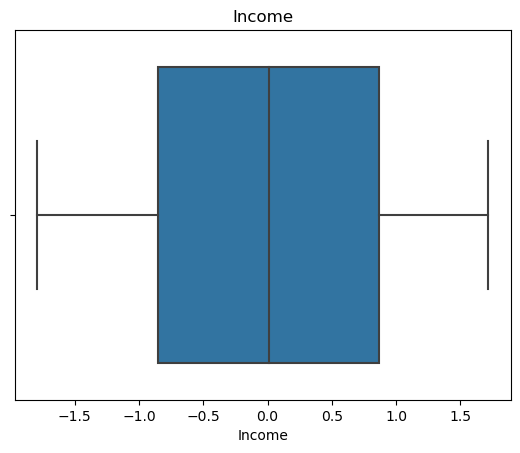

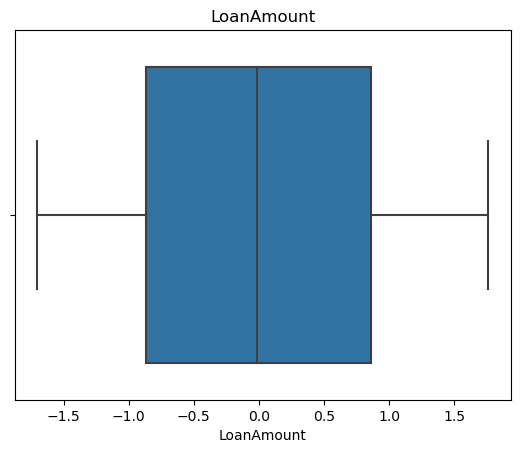

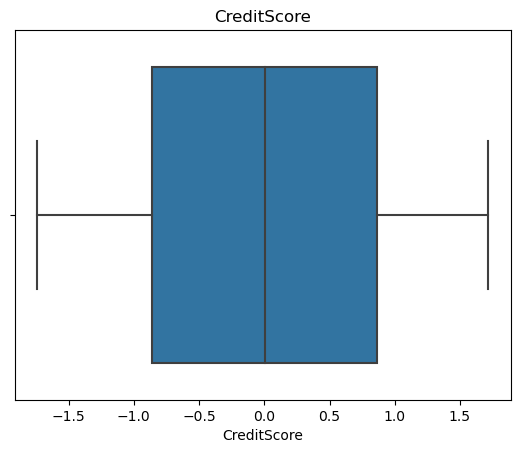

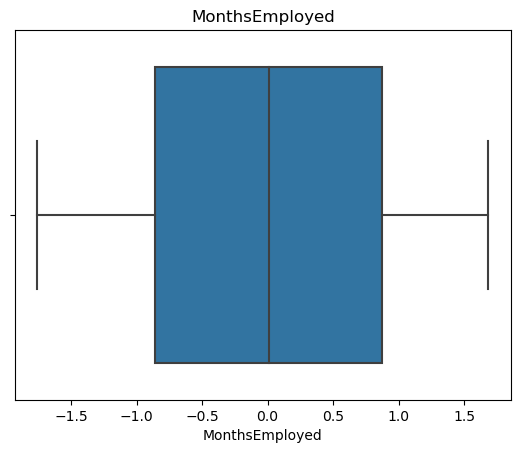

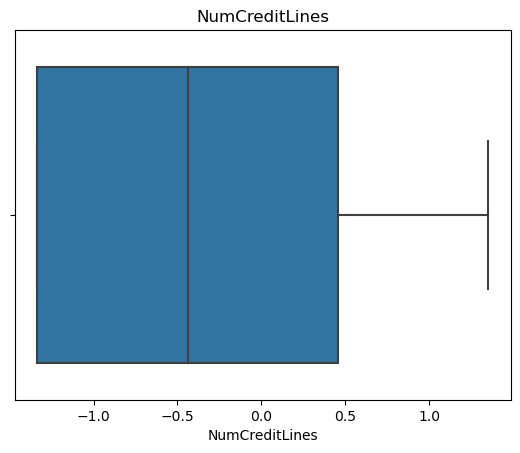

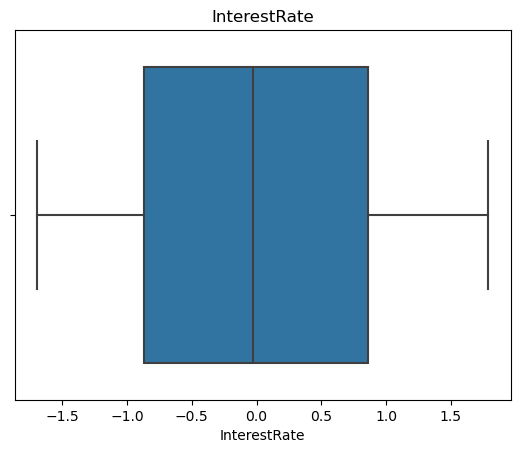

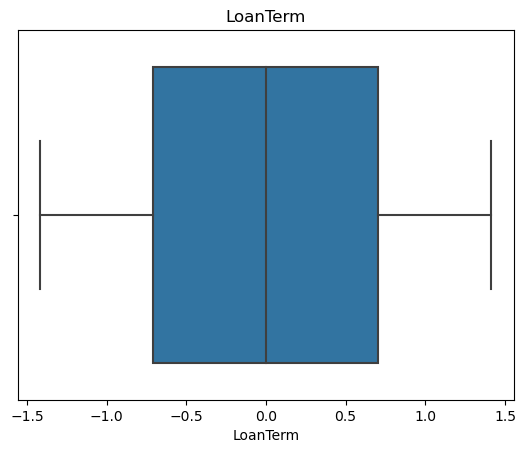

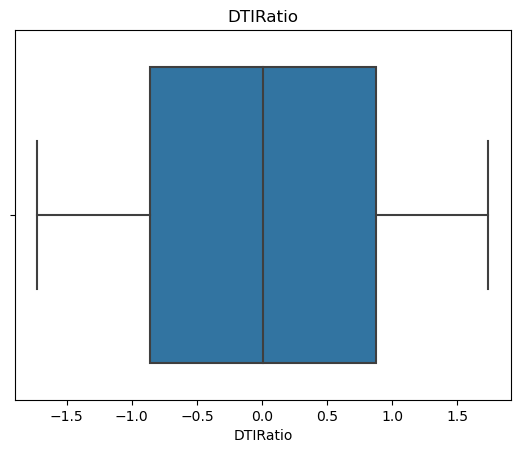

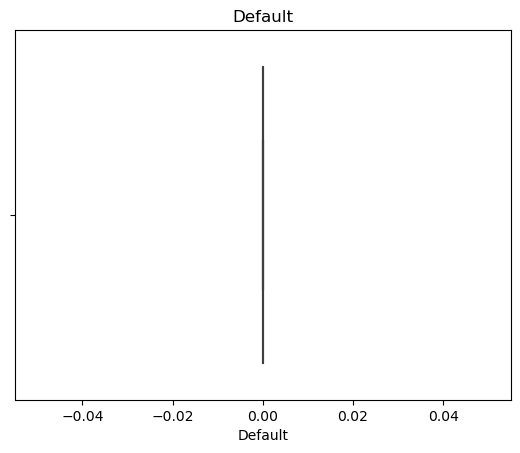

In [19]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


## 7️⃣ Final Cleaned Dataset Check

In [20]:
df.isnull().sum()
df.head()
df.shape


(225694, 18)